In [79]:
import hiive.mdptoolbox.mdp as mdp
import hiive.mdptoolbox.example as example

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [184]:
np.random.seed(0)

# Forest (small)

In [186]:
P, R = example.forest(S=3, r1=2, r2=8, p=0.5, is_sparse=False)

## Value Iteration

In [187]:
gamma = np.round(np.arange(0.1, 1.0, 0.1), 2)
print(gamma)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [188]:
vi_policies = []
vi_rewards = []
vi_time = []
vi_errors = []

for g in gamma:   
    vi = mdp.ValueIteration(P, R, gamma=g)
    vi.run()
    
    vi_policies.append(vi.policy)
    stats = vi.run_stats
    vi_rewards.append(stats[-1]["Reward"])
    vi_time.append(stats[-1]["Time"])
    vi_errors.append(stats[-1]["Error"])
    
print(np.asarray(vi_policies))

[[0 1 1]
 [0 1 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


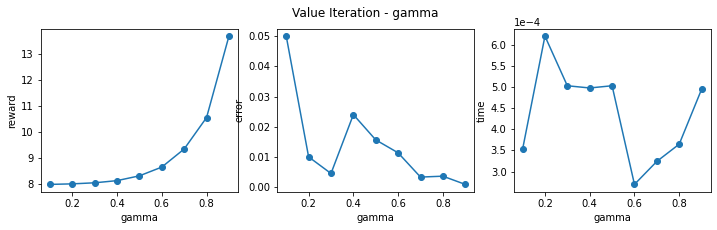

In [189]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Value Iteration - gamma')

ax1 = fig.add_subplot(131)
ax1.plot(gamma, vi_rewards,'-o')
ax1.set_xlabel("gamma")
ax1.set_ylabel("reward")

ax2 = fig.add_subplot(132)
ax2.plot(gamma, vi_errors,'-o')
ax2.set_xlabel("gamma")
ax2.set_ylabel("error")

ax3 = fig.add_subplot(133)
ax3.plot(gamma, vi_time, '-o')
ax3.set_xlabel("gamma")
ax3.set_ylabel("time")
ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

In [190]:
vi = mdp.ValueIteration(P, R, gamma=0.9)
vi.run()

vi_policy = np.asarray(vi.policy)
run_stats = vi.run_stats

iters = []
rewards = []
mean_V = []
max_V = []
time = []
error = []
for s in run_stats:
    iters.append(s['Iteration'])
    rewards.append(s['Reward'])
    mean_V.append(s['Mean V'])
    max_V.append(s['Max V'])
    time.append(s['Time'])
    error.append(s['Error'])

print(vi_policy)

[0 0 1]


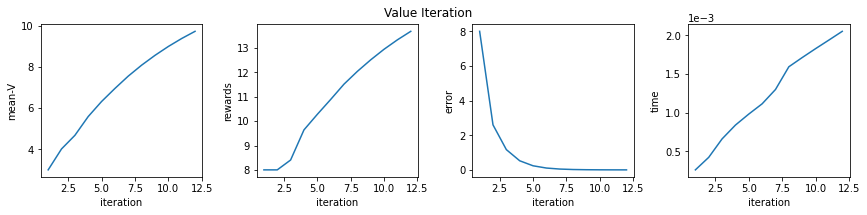

In [191]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Value Iteration')

ax1 = fig.add_subplot(141)
ax1.plot(iters, mean_V)
ax1.set_xlabel("iteration")
ax1.set_ylabel("mean-V")

ax2 = fig.add_subplot(142)
ax2.plot(iters, rewards)
ax2.set_xlabel("iteration")
ax2.set_ylabel("rewards")

ax3 = fig.add_subplot(143)
ax3.plot(iters, error)
ax3.set_xlabel("iteration")
ax3.set_ylabel("error")

ax4 = fig.add_subplot(144)
ax4.plot(iters, time)
ax4.set_xlabel("iteration")
ax4.set_ylabel("time")
ax4.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()

## Policy Iteration

In [144]:
gamma = np.round(np.arange(0.1, 1.0, 0.1), 2)
print(gamma)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [145]:
pi_policies = []
pi_rewards = []
pi_time = []
pi_errors = []

for g in gamma:   
    pi = mdp.PolicyIteration(P, R, gamma=g)
    pi.run()
    
    pi_policies.append(pi.policy)
    stats = pi.run_stats
    pi_rewards.append(stats[-1]["Reward"])
    pi_time.append(stats[-1]["Time"])
    pi_errors.append(stats[-1]["Error"])
    
print(np.asarray(pi_policies))

[[0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


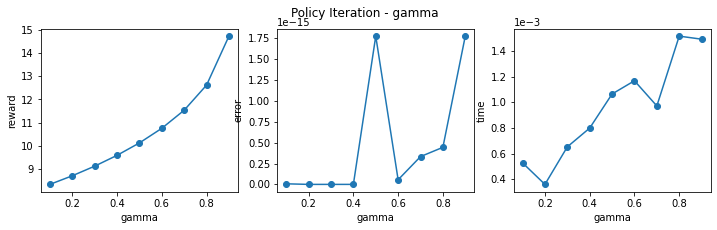

In [146]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Policy Iteration - gamma')


ax1 = fig.add_subplot(131)
ax1.plot(gamma, pi_rewards,'-o')
ax1.set_xlabel("gamma")
ax1.set_ylabel("reward")

ax2 = fig.add_subplot(132)
ax2.plot(gamma, pi_errors,'-o')
ax2.set_xlabel("gamma")
ax2.set_ylabel("error")


ax3 = fig.add_subplot(133)
ax3.plot(gamma, pi_time, '-o')
ax3.set_xlabel("gamma")
ax3.set_ylabel("time")
ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

In [149]:
pi = mdp.PolicyIteration(P, R, gamma=0.9)
pi.run()

pi_policy = np.asarray(pi.policy)
run_stats = pi.run_stats

iters = []
rewards = []
mean_V = []
max_V = []
time = []
error = []
for s in run_stats:
    iters.append(s['Iteration'])
    rewards.append(s['Reward'])
    mean_V.append(s['Mean V'])
    max_V.append(s['Max V'])
    time.append(s['Time'])
    error.append(s['Error'])

print(pi_policy)

[0 1 0 0 0]


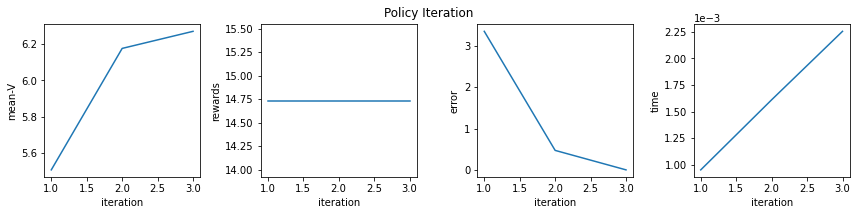

In [148]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Policy Iteration')

ax1 = fig.add_subplot(141)
ax1.plot(iters, mean_V)
ax1.set_xlabel("iteration")
ax1.set_ylabel("mean-V")

ax2 = fig.add_subplot(142)
ax2.plot(iters, rewards)
ax2.set_xlabel("iteration")
ax2.set_ylabel("rewards")

ax3 = fig.add_subplot(143)
ax3.plot(iters, error)
ax3.set_xlabel("iteration")
ax3.set_ylabel("error")

ax4 = fig.add_subplot(144)
ax4.plot(iters, time)
ax4.set_xlabel("iteration")
ax4.set_ylabel("time")
ax4.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()

In [150]:
print(pi_policy)
print(iters)
print(rewards)
print(mean_V)
print(max_V)
print(time)
print(error)

[0 1 0 0 0]
[1, 2, 3]
[14.733455882352944, 14.733455882352942, 14.733455882352942]
[5.505514705882353, 6.175735294117647, 6.269955882352943]
[14.733455882352944, 14.733455882352942, 14.733455882352942]
[0.0006911754608154297, 0.0013494491577148438, 0.0019183158874511719]
[3.351102941176472, 0.47110294117647067, 1.7763568394002505e-15]


## Q-Learning

In [151]:
gammas = [0.1, 0.3, 0.5, 0.7, 0.9]
alphas = [0.1, 0.5, 0.9]
epsilons = [0.1, 0.5]
epsilon_decays = [0.0001, 0.001]


In [152]:
ql_params = []
ql_policies = []
ql_rewards = []
ql_time = []
ql_errors = []

for g in gammas:
    for a in alphas:
        for e in epsilons:
            for decay in epsilon_decays:

                ql = mdp.QLearning(P, R, gamma=g, alpha=a, epsilon=e, epsilon_decay=decay, n_iter=100000)
                ql.run()
                
                ql_policies.append(ql.policy)
                ql_time.append(ql.time)                
                ql_params.append([g,a,e,decay])
                
                stats = ql.run_stats
                ql_rewards.append(stats[-1]["Reward"])
                ql_errors.append(stats[-1]["Error"])
                
# print(np.asarray(ql_policies))

[[0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 1 1 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 0 0]
 [0 1 1 0 1]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 1 1 0]
 [0 1 1 1 1]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 1 1 1]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 1 0 0]
 [0 1 1 1 0]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 1 0 0]
 [0 1 1 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 1 0 0]
 [0 1 1 1 0]
 [0 1 1 0 1]
 [0 1 0 0 0]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 1 0 0]
 [0 1 0 1 0]
 [0 1 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 1]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 1 0]
 [0 1 0 0 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 1 1 0 0]]


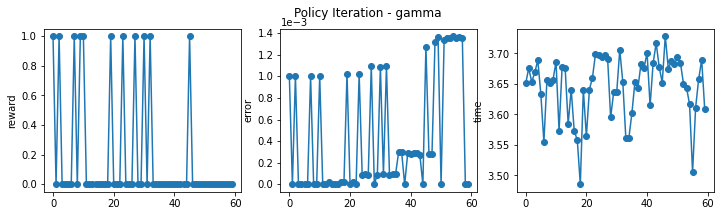

In [77]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Policy Iteration - gamma')


ax1 = fig.add_subplot(131)
ax1.plot(ql_rewards,'-o')
ax1.set_xlabel("")
ax1.set_ylabel("reward")

ax2 = fig.add_subplot(132)
ax2.plot(ql_errors,'-o')
ax2.set_xlabel("")
ax2.set_ylabel("error")
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax3 = fig.add_subplot(133)
ax3.plot(ql_time, '-o')
ax3.set_xlabel("")
ax3.set_ylabel("time")
ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

In [87]:
df = pd.DataFrame({"rewards": ql_rewards,
                    "errors": ql_errors,
                    "times": ql_time,
                    "params": ql_params
                   })
df_ql = df[df["rewards"]==1]
df_ql

,rewards,errors,times,params
0,1.0,1.002284e-03,3.650830,"[0.1, 0.1, 0.1, 0.0001]"
2,1.0,1.001237e-03,3.653503,"[0.1, 0.1, 0.5, 0.0001]"
7,1.0,1.001069e-03,3.656689,"[0.1, 0.5, 0.5, 0.001]"
9,1.0,5.224224e-08,3.656738,"[0.1, 0.9, 0.1, 0.001]"
10,1.0,1.001246e-03,3.686344,"[0.1, 0.9, 0.5, 0.0001]"
19,1.0,1.023418e-03,3.640919,"[0.3, 0.5, 0.5, 0.001]"
23,1.0,1.022300e-03,3.699160,"[0.3, 0.9, 0.5, 0.001]"
27,1.0,1.091279e-03,3.691612,"[0.5, 0.1, 0.5, 0.001]"
30,1.0,1.088630e-03,3.636109,"[0.5, 0.5, 0.5, 0.0001]"
32,1.0,1.092058e-03,3.653304,"[0.5, 0.9, 0.1, 0.0001]"


In [90]:
g,a,e,decay = [0.1, 0.9, 0.5, 0.0001]

ql = mdp.QLearning(P, R, gamma=g, alpha=a, epsilon=e, epsilon_decay=decay, n_iter=100000)
ql.run()

ql_policy = np.asarray(ql.policy)
run_stats = ql.run_stats

iters = []
rewards = []
mean_V = []
max_V = []
time = []
error = []
for s in run_stats:
    iters.append(s['Iteration'])
    rewards.append(s['Reward'])
    mean_V.append(s['Mean V'])
    max_V.append(s['Max V'])
    time.append(s['Time'])
    error.append(s['Error'])

print(ql_policy) 

[0 1 1 1 1 1 1 1 1 0]


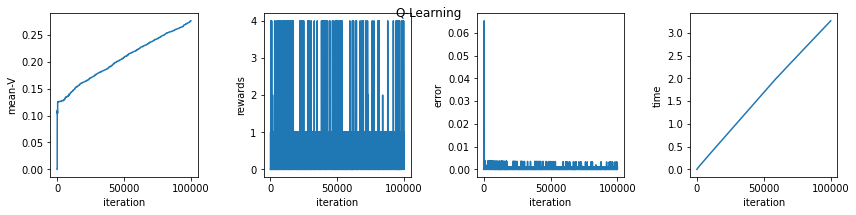

In [92]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Q-Learning')

ax1 = fig.add_subplot(141)
ax1.plot(iters, mean_V)
ax1.set_xlabel("iteration")
ax1.set_ylabel("mean-V")

ax2 = fig.add_subplot(142)
ax2.plot(iters, rewards)
ax2.set_xlabel("iteration")
ax2.set_ylabel("rewards")

ax3 = fig.add_subplot(143)
ax3.plot(iters, error)
ax3.set_xlabel("iteration")
ax3.set_ylabel("error")

ax4 = fig.add_subplot(144)
ax4.plot(iters, time)
ax4.set_xlabel("iteration")
ax4.set_ylabel("time")
ax4.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()

# Forest (large)

In [192]:
P, R = example.forest(S=400, r1=2, r2=8, p=0.5, is_sparse=False)

## Value Iteration

In [193]:
gamma = np.round(np.arange(0.1, 1.0, 0.1), 2)
print(gamma)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [194]:
vi_policies = []
vi_rewards = []
vi_time = []
vi_errors = []

for g in gamma:   
    vi = mdp.ValueIteration(P, R, gamma=g)
    vi.run()
    
    vi_policies.append(vi.policy)
    stats = vi.run_stats
    vi_rewards.append(stats[-1]["Reward"])
    vi_time.append(stats[-1]["Time"])
    vi_errors.append(stats[-1]["Error"])
    
print(np.asarray(vi_policies))

[[0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 0 1]
 ...
 [0 1 1 ... 1 0 1]
 [0 1 1 ... 0 0 1]
 [0 1 1 ... 0 0 1]]


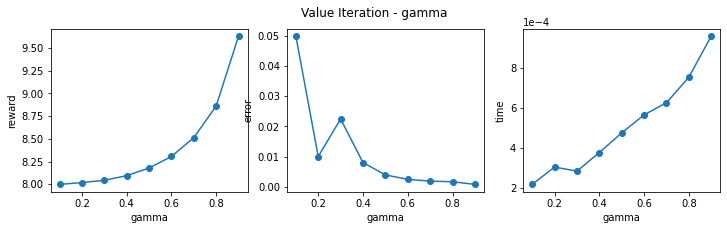

In [195]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Value Iteration - gamma')

ax1 = fig.add_subplot(131)
ax1.plot(gamma, vi_rewards,'-o')
ax1.set_xlabel("gamma")
ax1.set_ylabel("reward")

ax2 = fig.add_subplot(132)
ax2.plot(gamma, vi_errors,'-o')
ax2.set_xlabel("gamma")
ax2.set_ylabel("error")

ax3 = fig.add_subplot(133)
ax3.plot(gamma, vi_time, '-o')
ax3.set_xlabel("gamma")
ax3.set_ylabel("time")
ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

In [196]:
vi = mdp.ValueIteration(P, R, gamma=0.9)
vi.run()

vi_policy = np.asarray(vi.policy)
run_stats = vi.run_stats

iters = []
rewards = []
mean_V = []
max_V = []
time = []
error = []
for s in run_stats:
    iters.append(s['Iteration'])
    rewards.append(s['Reward'])
    mean_V.append(s['Mean V'])
    max_V.append(s['Max V'])
    time.append(s['Time'])
    error.append(s['Error'])

print(vi_policy)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


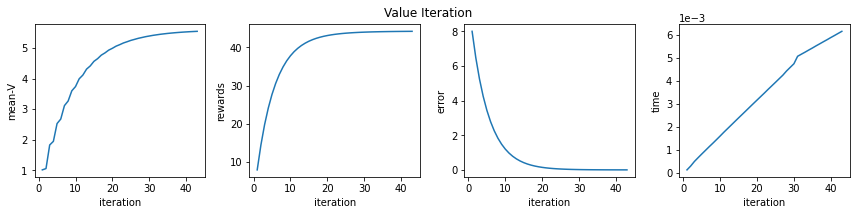

In [178]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Value Iteration')

ax1 = fig.add_subplot(141)
ax1.plot(iters, mean_V)
ax1.set_xlabel("iteration")
ax1.set_ylabel("mean-V")

ax2 = fig.add_subplot(142)
ax2.plot(iters, rewards)
ax2.set_xlabel("iteration")
ax2.set_ylabel("rewards")

ax3 = fig.add_subplot(143)
ax3.plot(iters, error)
ax3.set_xlabel("iteration")
ax3.set_ylabel("error")

ax4 = fig.add_subplot(144)
ax4.plot(iters, time)
ax4.set_xlabel("iteration")
ax4.set_ylabel("time")
ax4.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()

## Policy Iteration

In [197]:
gamma = np.round(np.arange(0.1, 1.0, 0.1), 2)
print(gamma)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [198]:
pi_policies = []
pi_rewards = []
pi_time = []
pi_errors = []

for g in gamma:   
    pi = mdp.PolicyIteration(P, R, gamma=g)
    pi.run()
    
    pi_policies.append(pi.policy)
    stats = pi.run_stats
    pi_rewards.append(stats[-1]["Reward"])
    pi_time.append(stats[-1]["Time"])
    pi_errors.append(stats[-1]["Error"])
    
print(np.asarray(pi_policies))

[[0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 0 1]
 ...
 [0 1 1 ... 1 0 1]
 [0 1 1 ... 0 0 1]
 [0 1 1 ... 0 0 1]]


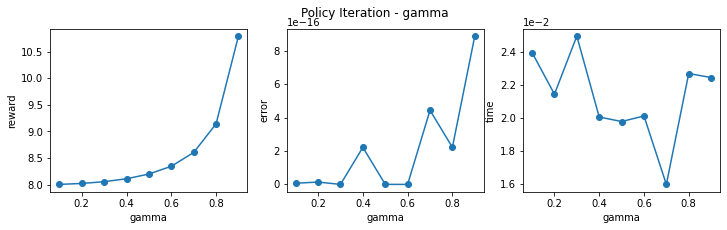

In [199]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Policy Iteration - gamma')


ax1 = fig.add_subplot(131)
ax1.plot(gamma, pi_rewards,'-o')
ax1.set_xlabel("gamma")
ax1.set_ylabel("reward")

ax2 = fig.add_subplot(132)
ax2.plot(gamma, pi_errors,'-o')
ax2.set_xlabel("gamma")
ax2.set_ylabel("error")


ax3 = fig.add_subplot(133)
ax3.plot(gamma, pi_time, '-o')
ax3.set_xlabel("gamma")
ax3.set_ylabel("time")
ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

In [202]:
pi = mdp.PolicyIteration(P, R, gamma=0.6)
pi.run()

pi_policy = np.asarray(pi.policy)
run_stats = pi.run_stats

iters = []
rewards = []
mean_V = []
max_V = []
time = []
error = []
for s in run_stats:
    iters.append(s['Iteration'])
    rewards.append(s['Reward'])
    mean_V.append(s['Mean V'])
    max_V.append(s['Max V'])
    time.append(s['Time'])
    error.append(s['Error'])



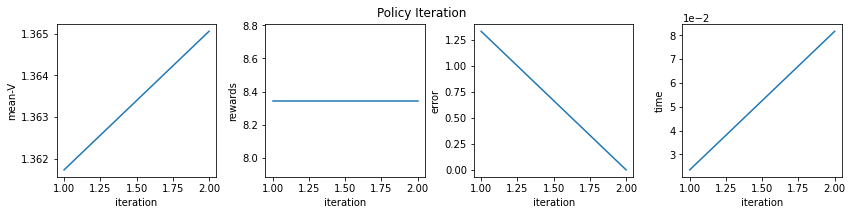

In [203]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Policy Iteration')

ax1 = fig.add_subplot(141)
ax1.plot(iters, mean_V)
ax1.set_xlabel("iteration")
ax1.set_ylabel("mean-V")

ax2 = fig.add_subplot(142)
ax2.plot(iters, rewards)
ax2.set_xlabel("iteration")
ax2.set_ylabel("rewards")

ax3 = fig.add_subplot(143)
ax3.plot(iters, error)
ax3.set_xlabel("iteration")
ax3.set_ylabel("error")

ax4 = fig.add_subplot(144)
ax4.plot(iters, time)
ax4.set_xlabel("iteration")
ax4.set_ylabel("time")
ax4.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()

In [204]:
print(pi_policy)
print(iters)
print(rewards)
print(mean_V)
print(max_V)
print(time)
print(error)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
[1, 2]
[8.346153846153847, 8.346153846153847]
[1.3617307692307696, 1.3650576923076927]
[8.346153846153847, 8.346153846153847]
[0.023468494415283203, 0.08166766166687012]
[1.330769230769230

## Q-Learning

In [75]:
gammas = [0.1, 0.3, 0.5, 0.7, 0.9]
alphas = [0.1, 0.5, 0.9]
epsilons = [0.1, 0.5]
epsilon_decays = [0.0001, 0.001]


In [76]:
ql_params = []
ql_policies = []
ql_rewards = []
ql_time = []
ql_errors = []

for g in gammas:
    for a in alphas:
        for e in epsilons:
            for decay in epsilon_decays:

                ql = mdp.QLearning(P, R, gamma=g, alpha=a, epsilon=e, epsilon_decay=decay, n_iter=100000)
                ql.run()
                
                ql_policies.append(ql.policy)
                ql_time.append(ql.time)                
                ql_params.append([g,a,e,decay])
                
                stats = ql.run_stats
                ql_rewards.append(stats[-1]["Reward"])
                ql_errors.append(stats[-1]["Error"])
                
print(np.asarray(ql_policies))

[[0 1 1 ... 0 0 0]
 [0 1 1 ... 0 1 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


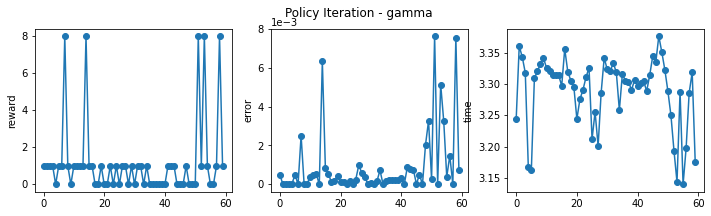

In [153]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Policy Iteration - gamma')


ax1 = fig.add_subplot(131)
ax1.plot(ql_rewards,'-o')
ax1.set_xlabel("")
ax1.set_ylabel("reward")

ax2 = fig.add_subplot(132)
ax2.plot(ql_errors,'-o')
ax2.set_xlabel("")
ax2.set_ylabel("error")
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax3 = fig.add_subplot(133)
ax3.plot(ql_time, '-o')
ax3.set_xlabel("")
ax3.set_ylabel("time")
ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

In [87]:
df = pd.DataFrame({"rewards": ql_rewards,
                    "errors": ql_errors,
                    "times": ql_time,
                    "params": ql_params
                   })
df_ql = df[df["rewards"]==1]
df_ql

,rewards,errors,times,params
0,1.0,1.002284e-03,3.650830,"[0.1, 0.1, 0.1, 0.0001]"
2,1.0,1.001237e-03,3.653503,"[0.1, 0.1, 0.5, 0.0001]"
7,1.0,1.001069e-03,3.656689,"[0.1, 0.5, 0.5, 0.001]"
9,1.0,5.224224e-08,3.656738,"[0.1, 0.9, 0.1, 0.001]"
10,1.0,1.001246e-03,3.686344,"[0.1, 0.9, 0.5, 0.0001]"
19,1.0,1.023418e-03,3.640919,"[0.3, 0.5, 0.5, 0.001]"
23,1.0,1.022300e-03,3.699160,"[0.3, 0.9, 0.5, 0.001]"
27,1.0,1.091279e-03,3.691612,"[0.5, 0.1, 0.5, 0.001]"
30,1.0,1.088630e-03,3.636109,"[0.5, 0.5, 0.5, 0.0001]"
32,1.0,1.092058e-03,3.653304,"[0.5, 0.9, 0.1, 0.0001]"


In [90]:
g,a,e,decay = [0.1, 0.9, 0.5, 0.0001]

ql = mdp.QLearning(P, R, gamma=g, alpha=a, epsilon=e, epsilon_decay=decay, n_iter=100000)
ql.run()

ql_policy = np.asarray(ql.policy)
run_stats = ql.run_stats

iters = []
rewards = []
mean_V = []
max_V = []
time = []
error = []
for s in run_stats:
    iters.append(s['Iteration'])
    rewards.append(s['Reward'])
    mean_V.append(s['Mean V'])
    max_V.append(s['Max V'])
    time.append(s['Time'])
    error.append(s['Error'])

print(ql_policy) 

[0 1 1 1 1 1 1 1 1 0]


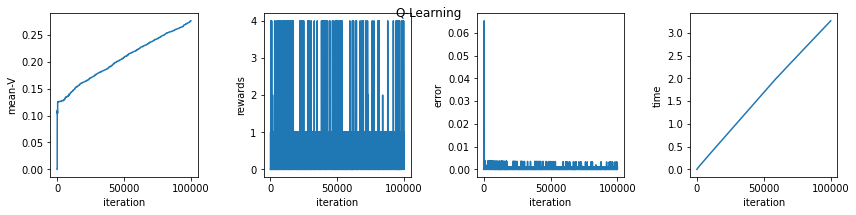

In [92]:
fig = plt.figure(figsize=(12,3))
fig.suptitle('Q-Learning')

ax1 = fig.add_subplot(141)
ax1.plot(iters, mean_V)
ax1.set_xlabel("iteration")
ax1.set_ylabel("mean-V")

ax2 = fig.add_subplot(142)
ax2.plot(iters, rewards)
ax2.set_xlabel("iteration")
ax2.set_ylabel("rewards")

ax3 = fig.add_subplot(143)
ax3.plot(iters, error)
ax3.set_xlabel("iteration")
ax3.set_ylabel("error")

ax4 = fig.add_subplot(144)
ax4.plot(iters, time)
ax4.set_xlabel("iteration")
ax4.set_ylabel("time")
ax4.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()